## K-means Clustering

## Importing the LBs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

## Using the elbow method to find the optimal number of clusters

K-평균 군집화의 엘보우 메소드(Elbow Method)를 사용하여 군집 수를 결정하는 과정 <br>
군집 수가 증가함에 따라 군집 내 제곱합(WCSS: Within-Cluster Sum of Squares)이 어떻게 감소하는지를 확인하여 적절한 군집 수를 찾는다.

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

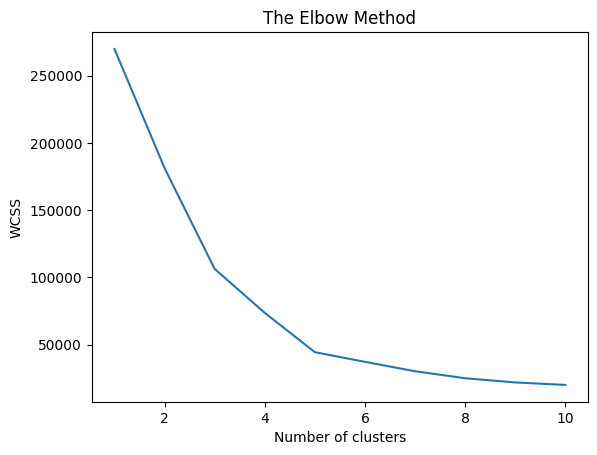

In [6]:
from sklearn.cluster import KMeans
wcss = []
# 군집 수를 1에서 10까지 변화시키면서 반복
for i in range(1, 11):
    # KMeans 모델을 생성하고 초기 중심을 'k-means++' 방식으로 설정
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia_: 군집 내 제곱합 값
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### k-means ++ 과정

In [ ]:
1. (일단 아무 공간에나 중심점을 k개 찍고 시작하는 게 아니라) 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 첫번째 중심점으로 지정한다. <br>
2. 해당 포인트와 나머지 점들간의 거리를 계산한다. <br>
3. 해당 포인트와 거리가 최대한 멀리 위치한 포인트를 그 다음 중심점으로 산정한다. <br>
4. 거리가 가장 먼 포인트가 k개가 될 때 까지 2,3번을 반복 수행한다. <br>


## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualizing the clusters

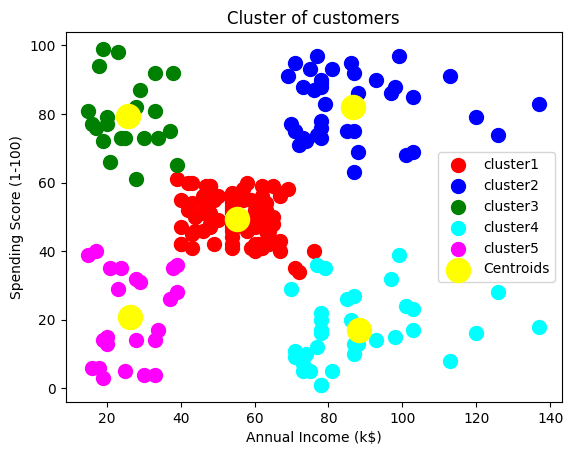

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c = 'green', label = 'cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 100, c = 'cyan', label = 'cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 100, c = 'magenta', label = 'cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()